In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 64
d = 1
w_real = np.array([2])
b_real = 0
X = np.random.uniform(low=-10,high=10, size=(N,d))
noise = np.random.normal(scale=2.0, size=N)
T = X @ w_real + b_real + noise

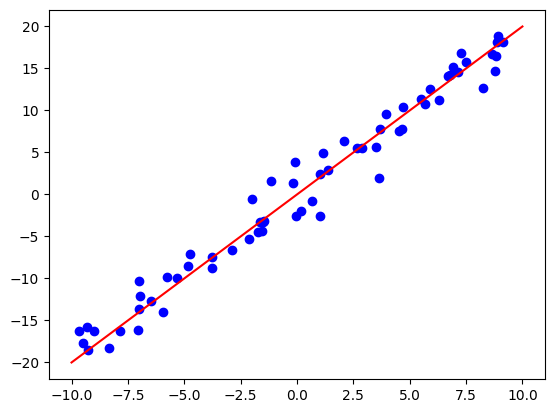

In [3]:
plt.scatter(X[:, 0], T, c='b', marker='o')
xx = np.linspace(-10, 10, 10)
yy = w_real[0] * xx + b_real
plt.plot(xx, yy, c='r')
plt.show()

In [4]:
#W = np.random.normal(size=(d,))
W = np.array([-3])
A = np.random.normal(size=(d,d))
X, W, A

(array([[-9.66324165],
        [ 1.0193974 ],
        [ 5.69821896],
        [-0.0494133 ],
        [-1.71231379],
        [ 3.640824  ],
        [ 8.80576269],
        [ 5.90344352],
        [ 7.27522769],
        [ 2.6670857 ],
        [-7.06273109],
        [ 8.93210458],
        [ 9.12076197],
        [-6.98545086],
        [-3.7593735 ],
        [-0.07008097],
        [ 1.01164406],
        [-5.7557172 ],
        [-6.94331787],
        [-5.33992485],
        [-9.02055157],
        [ 6.71969494],
        [ 1.39235866],
        [-3.77390871],
        [ 8.65528263],
        [-9.26614898],
        [-8.35837622],
        [-7.83678411],
        [ 3.68186253],
        [-1.64406597],
        [ 3.9324615 ],
        [-9.47889188],
        [-6.99155657],
        [-1.49224065],
        [ 4.6402634 ],
        [-5.93542124],
        [-4.8116956 ],
        [-2.12450007],
        [-2.86368048],
        [-6.45978227],
        [ 6.9031709 ],
        [ 8.23183988],
        [-9.31820909],
        [ 0

In [5]:
def J(w,x,y_t, a):
    n,d = x.shape
    #X (N,d) , (d) -> (N) (1)
    tmp = (w.T @ x.T - y_t) #shape (N)
    J = tmp @ tmp / n + w @ a @ w / 2
    return J 

In [6]:
J(W,X,T, A)

np.float64(818.0249438647679)

In [7]:
def J_grad_w(w,x,y_t, a):
    n,d = x.shape
    grad = 2*(x @ w - y_t) @ x /n + a @ w
    return grad

In [8]:
J_grad_w(W, X, T, A).shape

(1,)

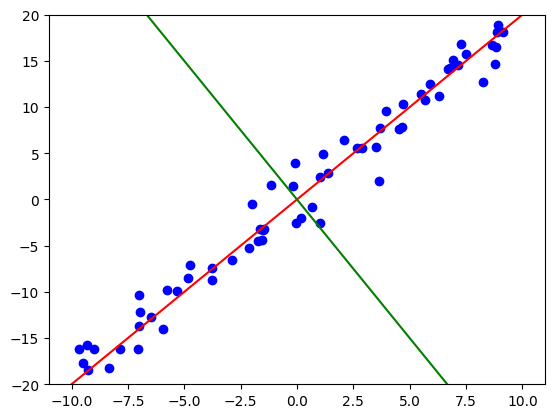

In [9]:
plt.scatter(X[:, 0], T, c='b', marker='o')
plt.plot(xx, yy, c='r')
yy_model = xx * W[0]
plt.plot(xx, yy_model, c='g')
plt.ylim((-20,20))
plt.show()

818.0249438647679


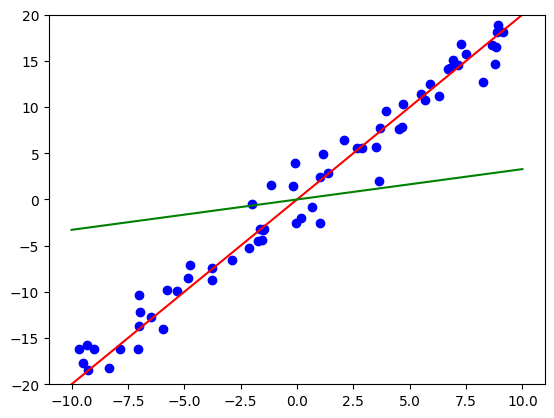

88.3984609571255


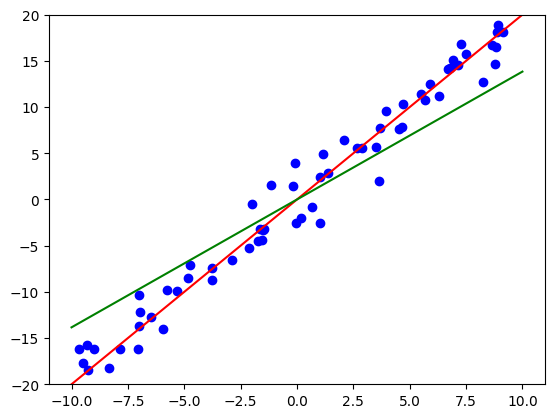

15.062989980946927


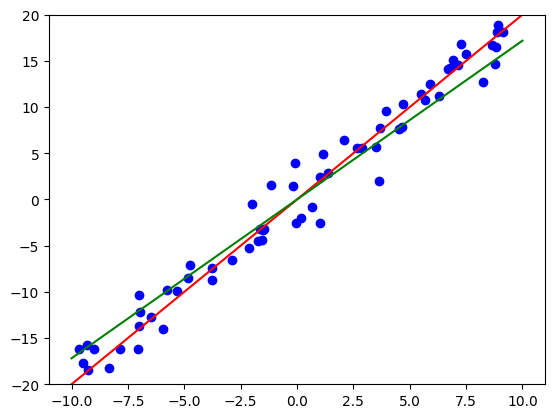

7.691970110799618


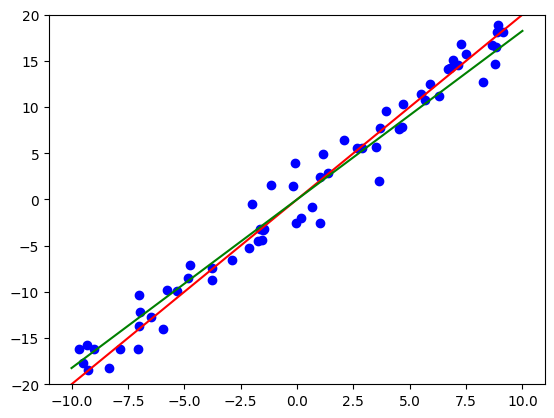

6.951101698789895


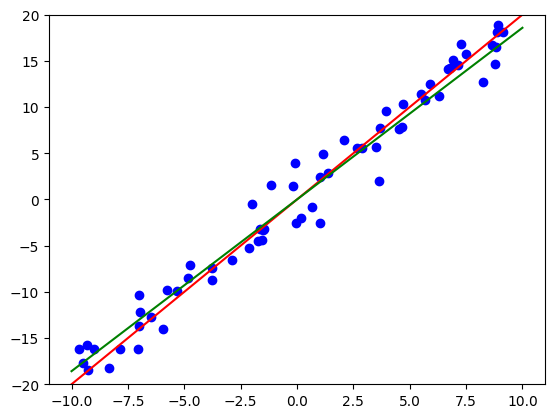

6.876636290531154


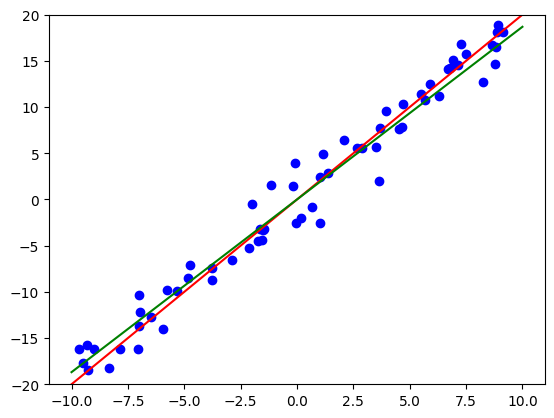

6.869151699560271


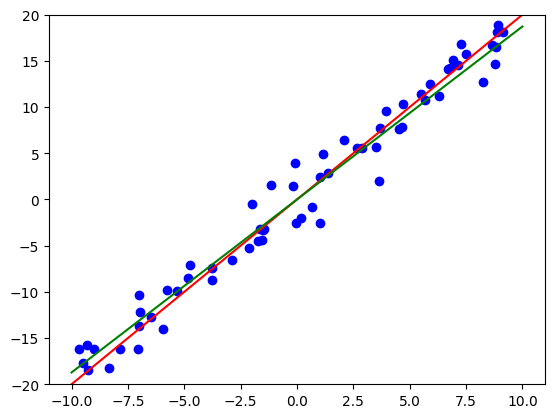

6.868399416005914


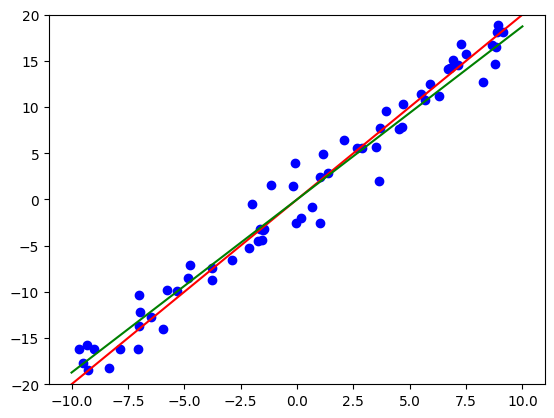

6.868323803250542


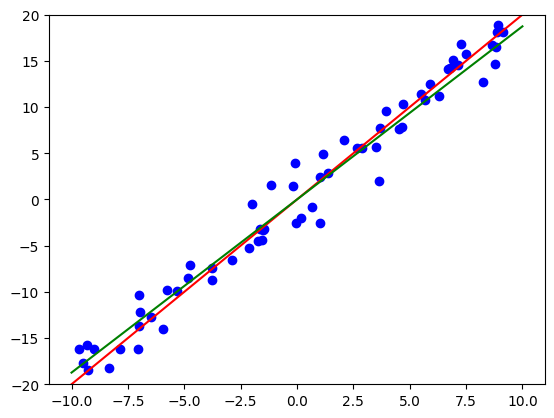

6.8683162033385905


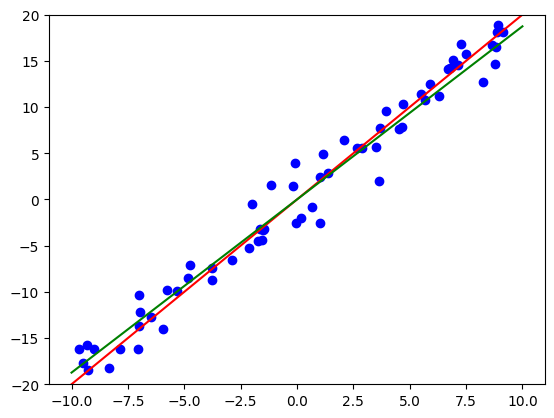

In [10]:
for i in range(10):
    print(J(W,X,T, A))
    W = W - 0.01* J_grad_w(W, X, T, A)
    plt.scatter(X[:, 0], T, c='b', marker='o')
    plt.plot(xx, yy, c='r')
    yy_model = xx * W[0]
    plt.plot(xx, yy_model, c='g')
    plt.ylim((-20,20))
    plt.show()


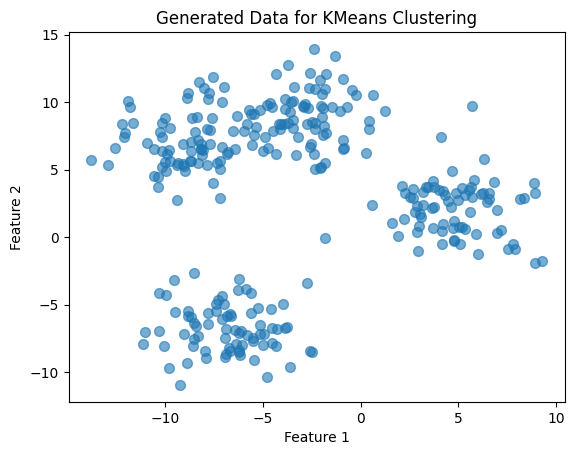

[[-3.64746944  2.97828769]
 [-3.4221673   3.60473272]
 [-3.86393233  2.19344822]
 [-2.70985163  2.55529034]]


In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=2.0, random_state=42)

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Data for KMeans Clustering")
plt.show()

K=4
N,d = X.shape
init_size_per_K = N // K
X_tmp = X[:init_size_per_K * K, :].reshape(K, init_size_per_K, d)
mu = X_tmp.sum(axis=1) / init_size_per_K
print(mu)

(4,) [ 11 137  78  74]


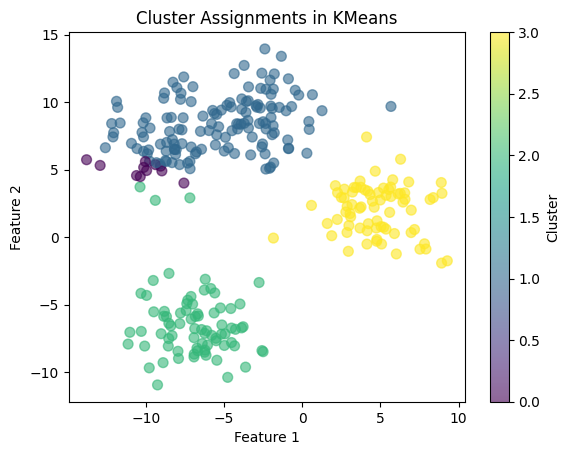

(4,) [ 50 100  75  75]


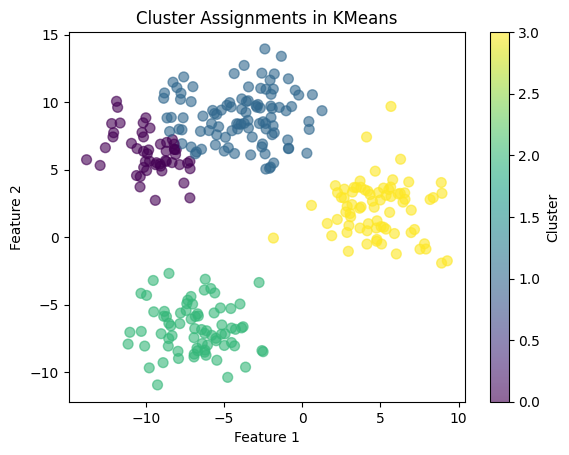

(4,) [63 87 75 75]


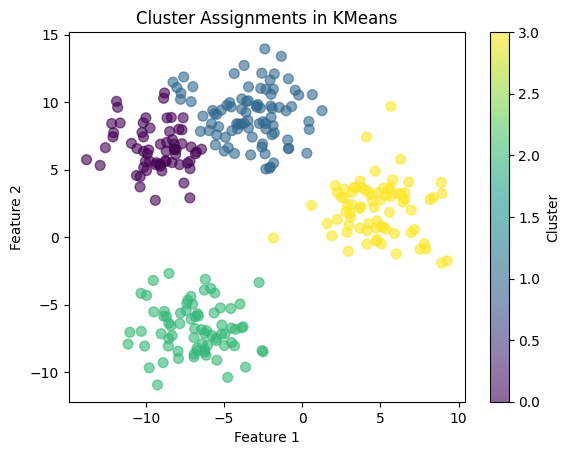

(4,) [68 82 75 75]


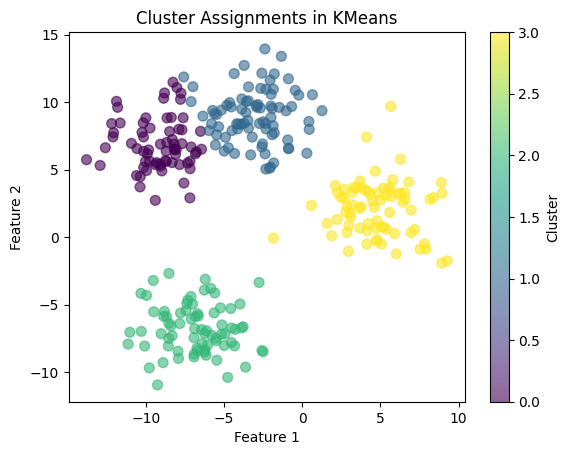

(4,) [70 80 75 75]


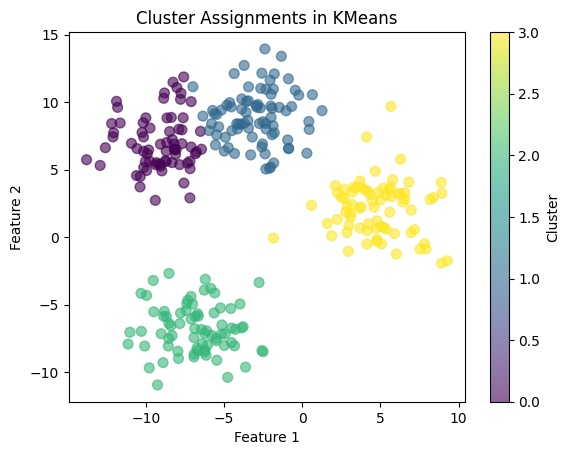

found clustering after 5 iterations


In [12]:
previous = np.zeros(mu.shape[0])
for i in range(20):
    # calc distances
    # X: (N,D)
    distances = -2 * X @ mu.T + np.sum(mu**2, axis=1).reshape((1,-1)) # shape (N,K)
    min_distance = np.min(distances, axis=1) # shape (N,1)
    indicator = distances <= min_distance.reshape((-1, 1)) # (N,K)
    
    # count points per cluster
    counts = np.sum(indicator, axis=0) # (K)
    if np.all(counts == previous):
        print("found clustering after {} iterations".format(i))
        break
    else:
        previous = counts
        
    print(counts.shape, counts)
    empty_centroids = counts == 0
    if np.any(empty_centroids):
        empty_indices = np.where(empty_centroids)[0]
        random_assignments = np.random.choice(X.shape[0], size=len(empty_indices), replace=False)
        counts[empty_indices] = 1
        indicator[random_assignments, empty_indices] = 1
    
    mu = indicator.T @ X / counts.reshape(-1, 1) # (K,d)
    # plotting
    arg_min_distance = np.argmin(distances, axis=1)
    plt.scatter(X[:, 0], X[:, 1], c=arg_min_distance, cmap='viridis', s=50, alpha=0.6)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Cluster Assignments in KMeans")
    plt.colorbar(label="Cluster")
    plt.show()